# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.shape

(2416, 7)

# Exploratory Data Analysis

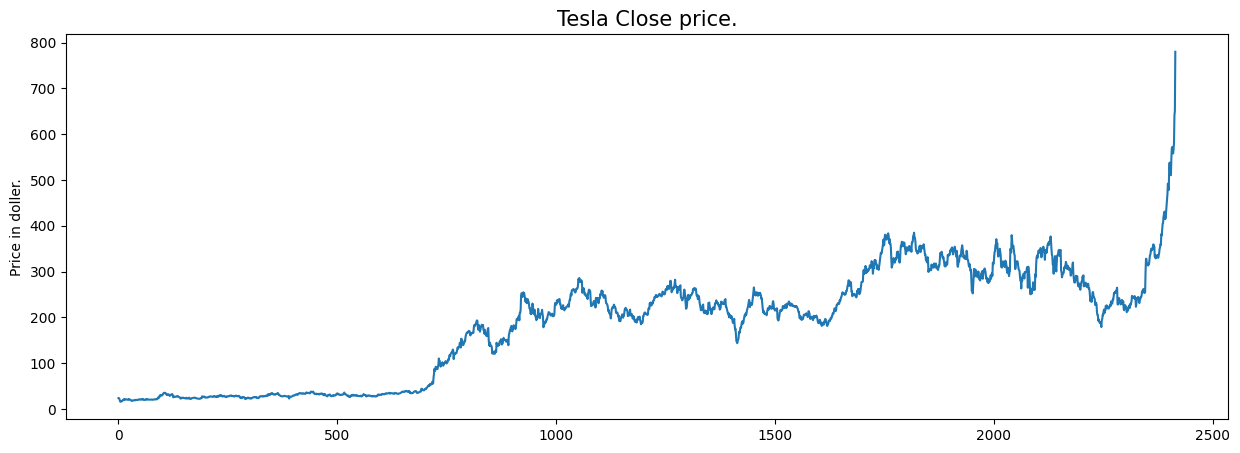

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize = 15)
plt.ylabel('Price in doller.')
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
# check duplicate(redundant data)
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [ ]:
# Drop or remove redundant
df = df.drop(['Adj Close'], axis=1)

In [ ]:
# check for null
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

That means no null value

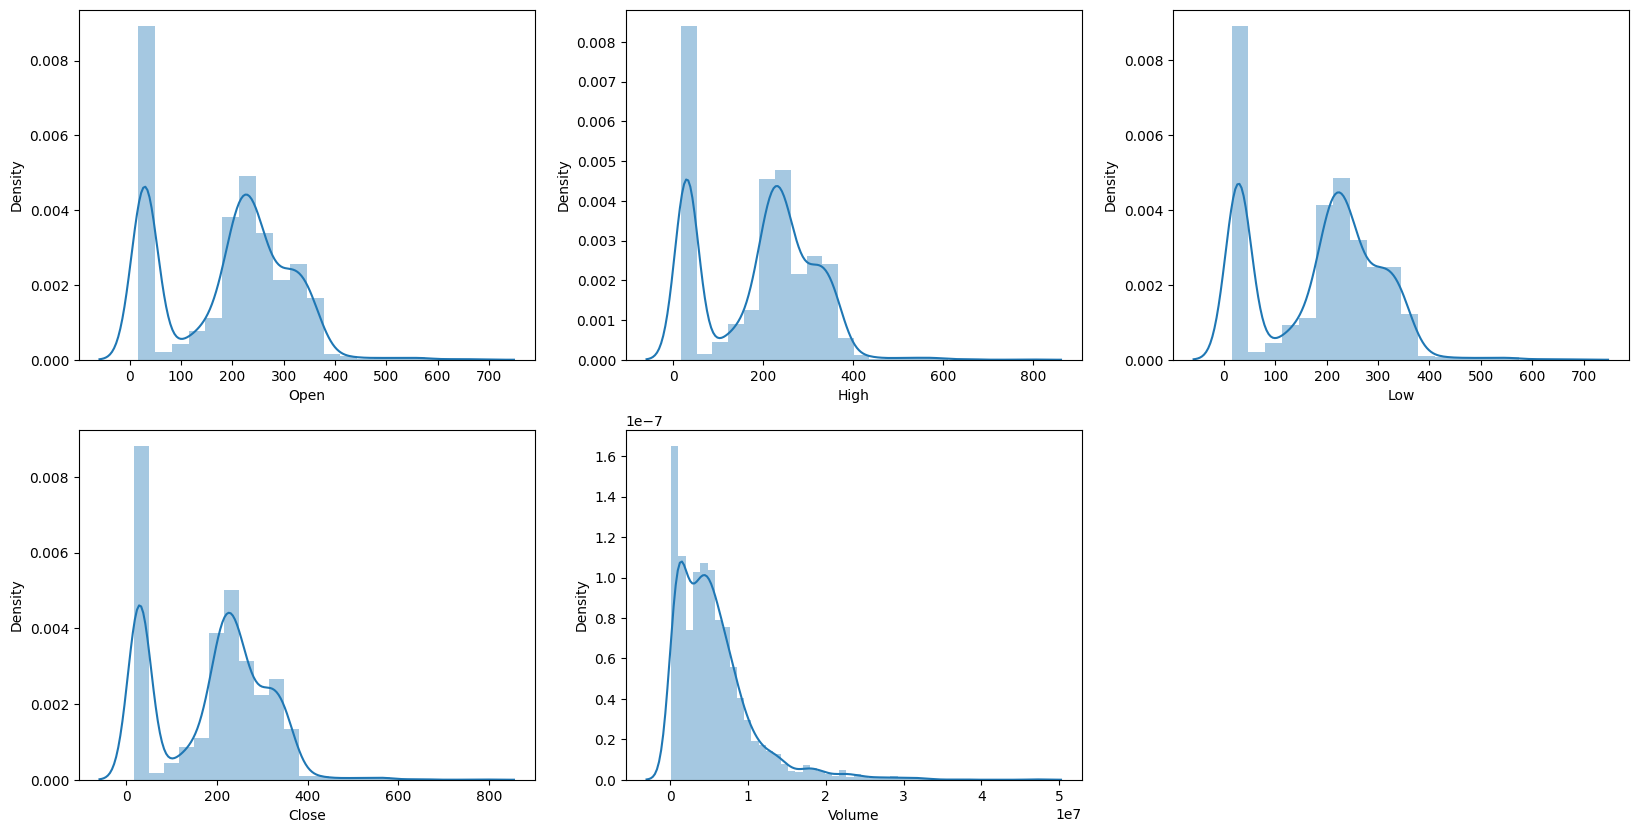

In [ ]:
# Distribution Plot
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

# here 2 peaks are showing that means data varied in 2 regions

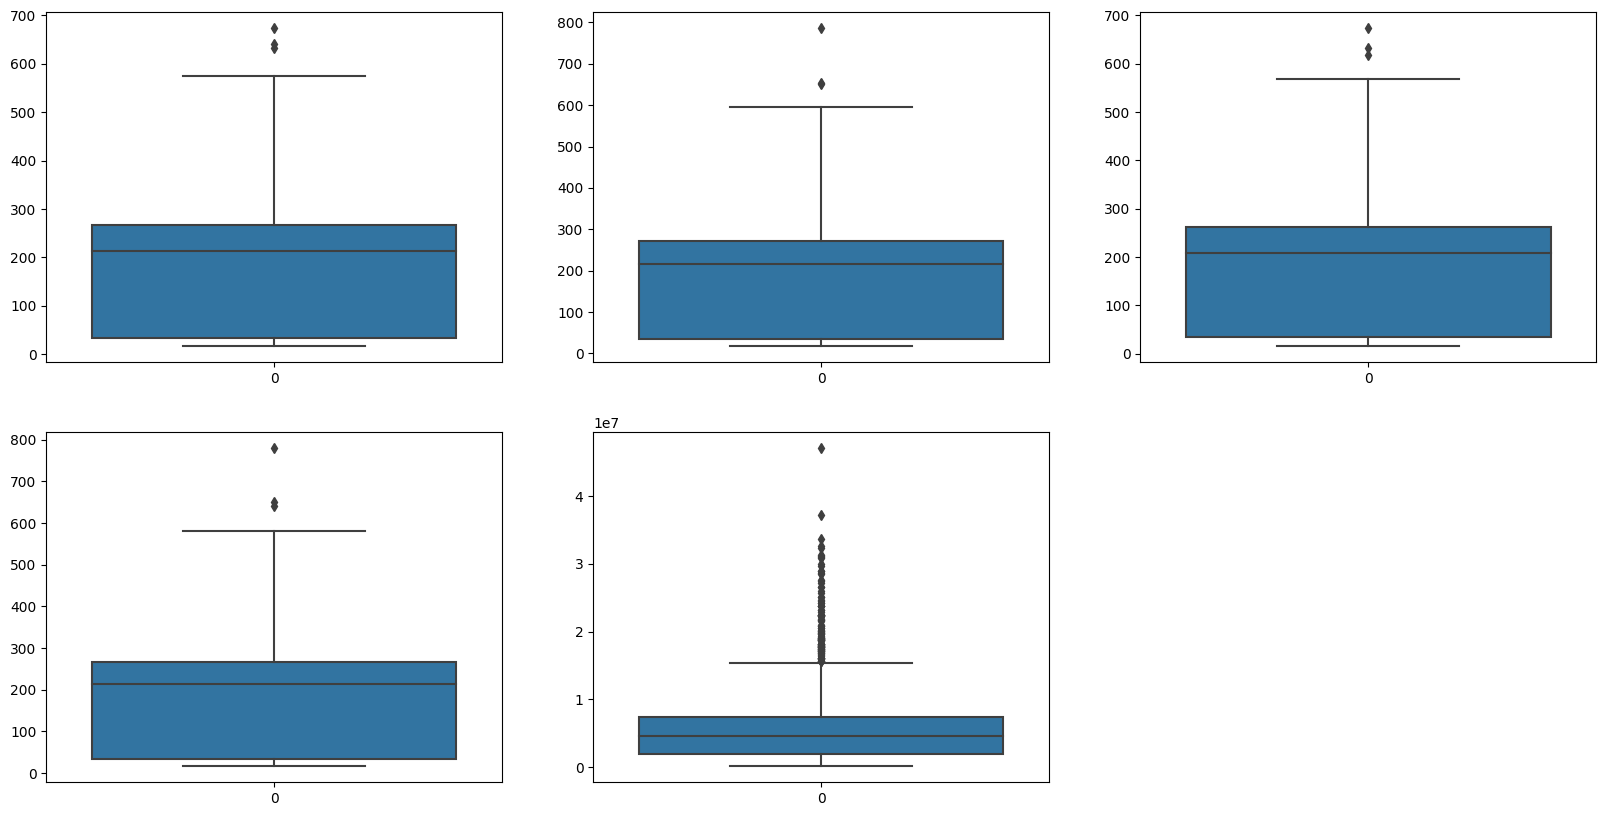

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['month'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,year,month
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,year,month,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6,1


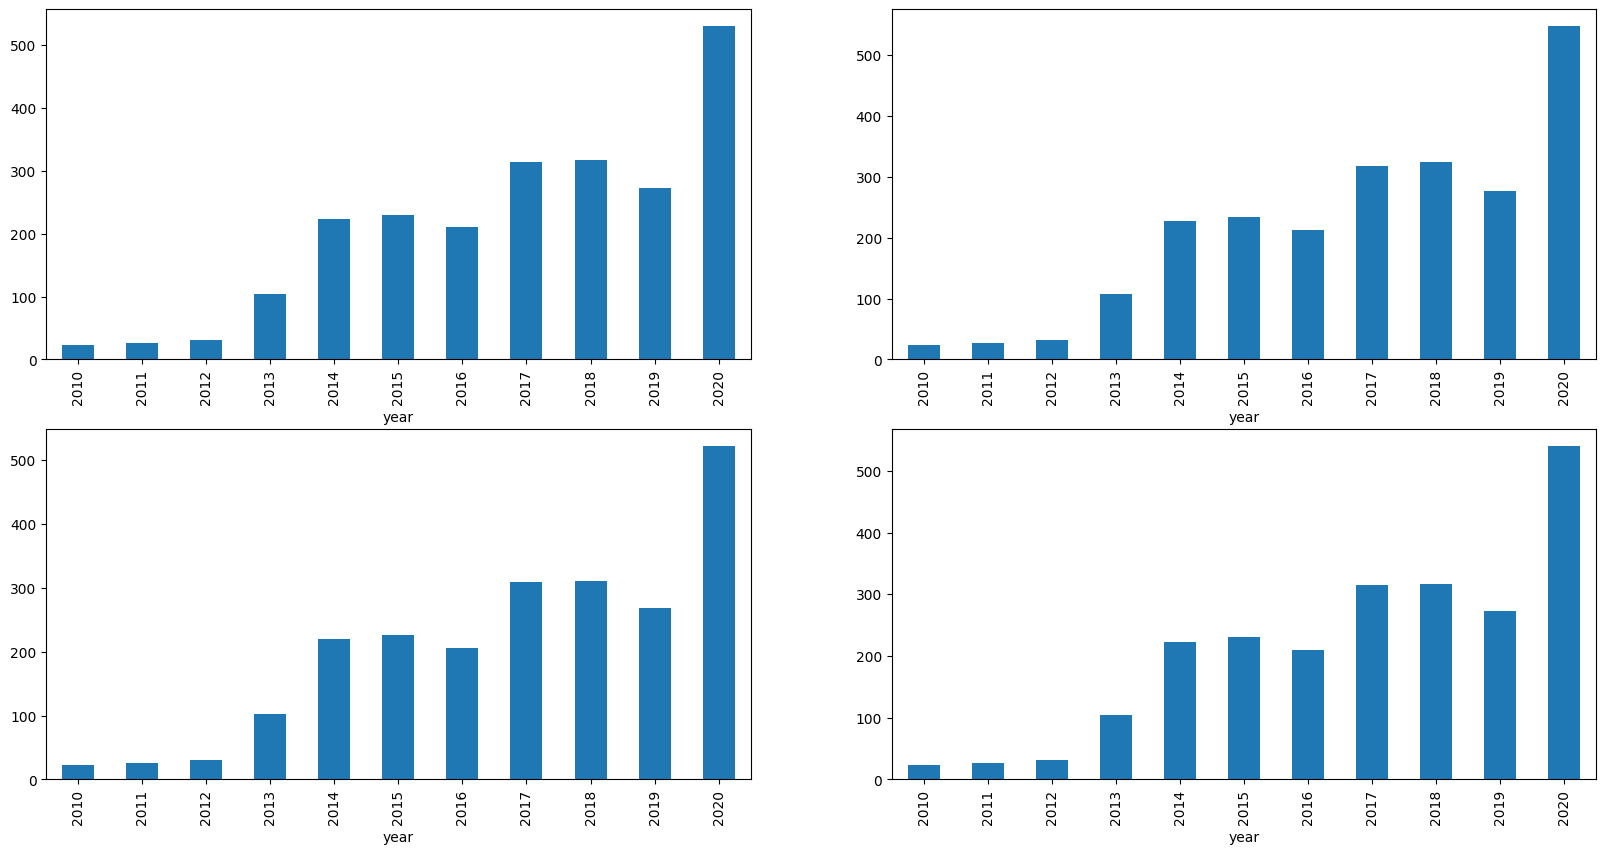

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,year,month
is_quarter_end,,,,,,,,
0,185.534559,188.854147,182.229914,185.717807,5.567002e+06,6.635860,2014.771411,15.457794
1,187.778689,191.060164,184.322131,187.807339,5.584427e+06,6.664565,2014.788146,16.343001


In [ ]:
df['open-close'] = df['Open']-df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

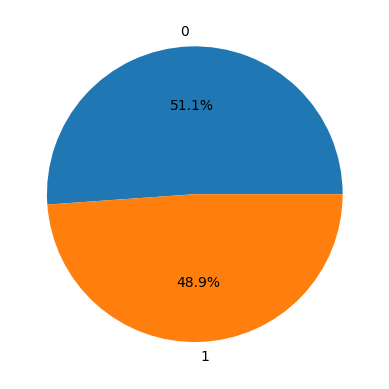

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

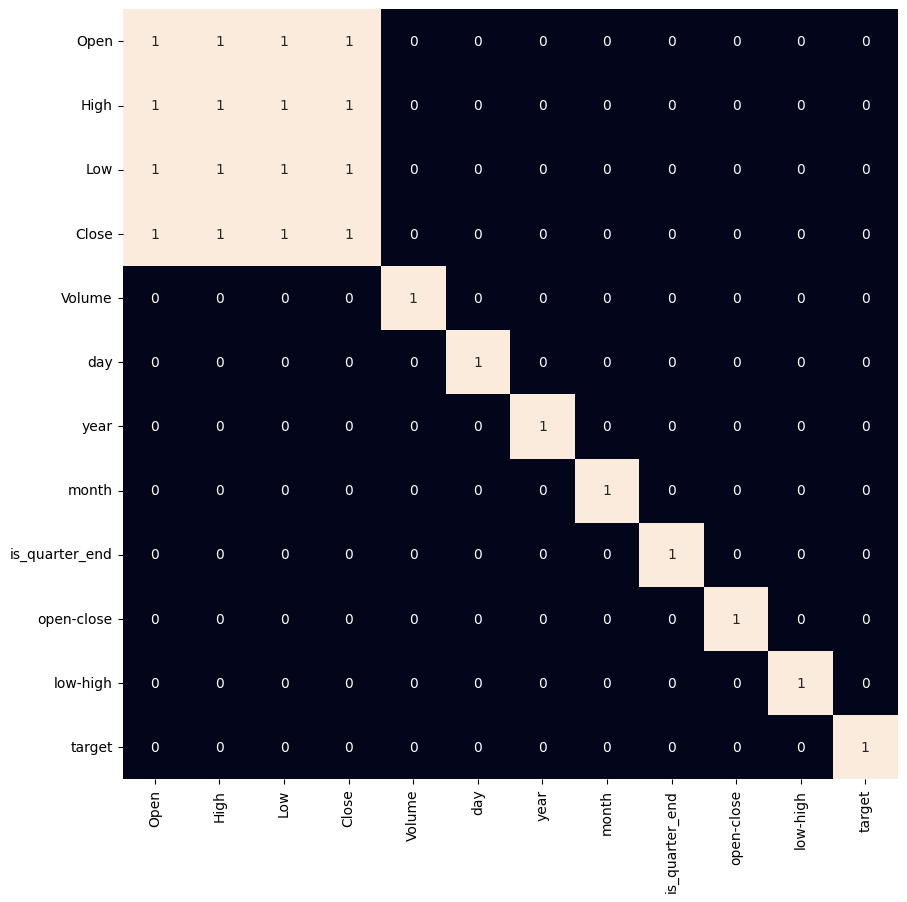

In [ ]:
plt.figure(figsize= (10,10))
#  Heatmap
sb.heatmap(df.corr() > 0.9, annot=True, cbar = False)
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 2022)
print(X_train.shape, X_test.shape)

(2174, 3) (242, 3)


In [ ]:
models = [LogisticRegression(), SVC(kernel = 'poly', probability = True), XGBClassifier()]
for i in range(3):
  models[i].fit(X_train, y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5181036927909507
Validation Accuracy :  0.5318828680897646

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4721484905828115
Validation Accuracy :  0.48741105637657356

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

In [ ]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
metrics.confusion_matrix(models[0], X_test, y_test)
plt.show()

TypeError: ignored

In [ ]:
import sklearn.metrics as metrics